<h1>Introduction to Linear Regression</h1>

<h2>Key Concepts</h2>

- Visualize multivariate data
- Fit a linear model
- Check the goodness of fit

<h2>Visualize Multivariate Data</h2>

First, we will load some helpful Python statistics packages:

- Pandas is a general purpose package for data analysis, particularly datasets that are measured over time (*pan*el *da*taset*s*)
- Numpy is a package for easily manipulating matrices and includes some basic multivariate statistics and linear algebra functions
- Matplotlib is a package for plotting data

All of these packages can be downloaded for free online.

In [11]:
%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In this class, we'll look at **World Happiness Report 2018**, derived from actual transactions. The World Happiness Report is a landmark survey of the state of global happiness. It ranks 156 countries by their happiness levels, and 117 countries by the happiness of their immigrants.                                                                    <br><br> For more information about the report read **http://worldhappiness.report/ed/2018/**.    The dataset comes as a list of comma-separated values (.csv), for which Pandas provides a convenient loading function.

##### Let's look at the data

In [89]:
data = pd.read_csv("../datasets/world_happiness_report_2018.csv")
data = data.dropna()
data.head()

,country,year,Life Ladder,GDP per capita,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year
0,Afghanistan,2008,3.723590,1298.143187,7.168690,0.450662,49.209663,0.718114,0.181819,0.881686,0.517637,0.258195,0.612072,-1.929690,-1.655084,1.774662,0.476600
1,Afghanistan,2009,4.401778,1531.173671,7.333790,0.552308,49.624432,0.678896,0.203614,0.850035,0.583926,0.237092,0.611545,-2.044093,-1.635025,1.722688,0.391362
2,Afghanistan,2010,4.758381,1614.254675,7.386629,0.539075,50.008961,0.600127,0.137630,0.706766,0.618265,0.275324,0.299357,-1.991810,-1.617176,1.878622,0.394803
3,Afghanistan,2011,3.831719,1660.739989,7.415019,0.521104,50.367298,0.495901,0.175329,0.731109,0.611387,0.267175,0.307386,-1.919018,-1.616221,1.785360,0.465942
4,Afghanistan,2012,3.782938,1839.273772,7.517126,0.520637,50.709263,0.530935,0.247159,0.775620,0.710385,0.267919,0.435440,-1.842996,-1.404078,1.798283,0.475367


<IPython.core.display.Javascript object>


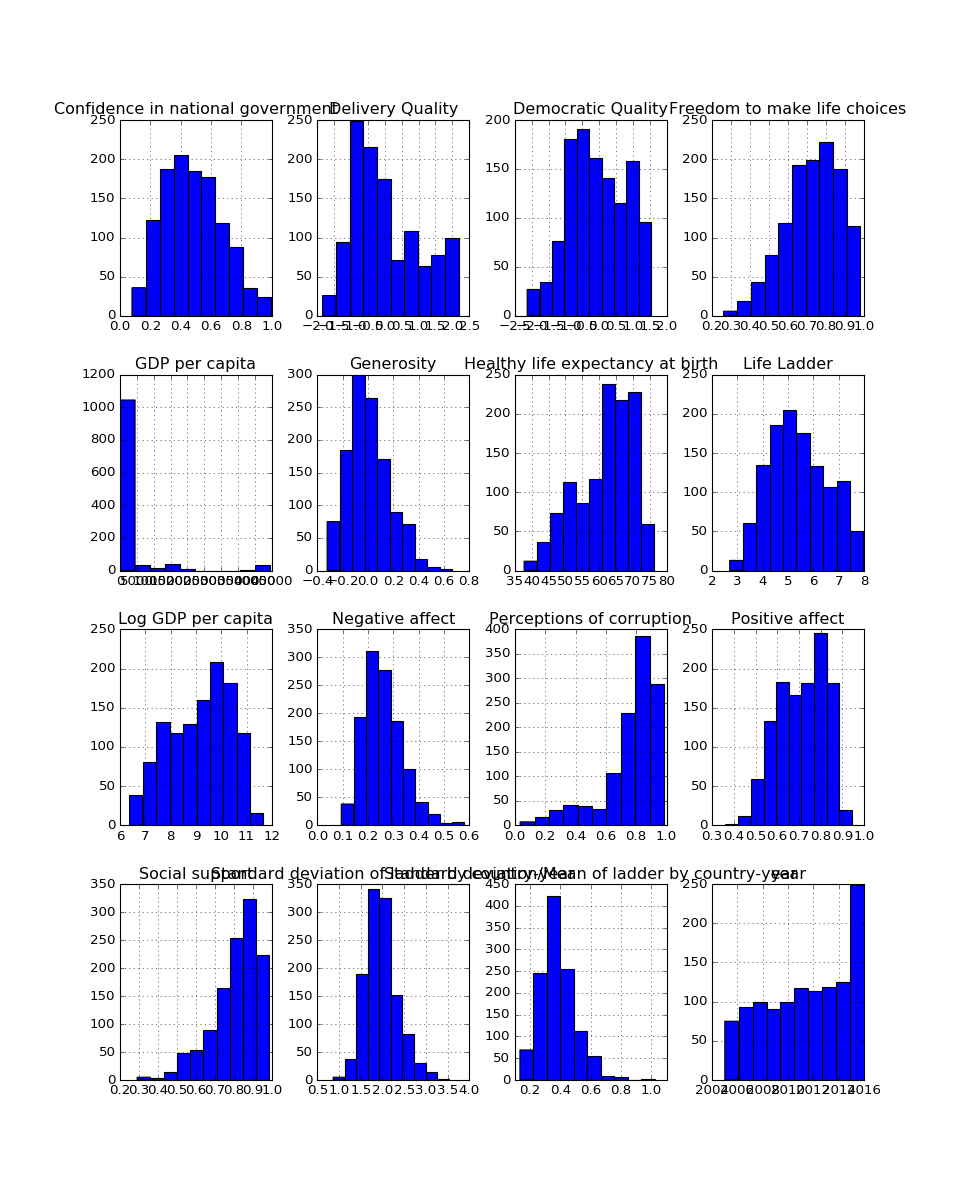

In [90]:
fig = plt.figure(figsize = (12,15))
ax = fig.gca()
data.hist(ax = ax);

There can be multiple hypothesis about what drives the happiness of a nation up. Maybe more generous the people are happier in life and as such have higher life ladder. Maybe it doesnt have anything to do with the generosity of people and what really matters is the GDP per capita of the company. For this week, since we are exploring single varible regressions, let's pick one variable and dive deeper into it. 

##### Hypothesis 1

An obvious hypothesis to test is whether or not more developed countries have higher levels of happiness. In other words, does higher GDP suggest higher Life Ladder score. We first plot the data to see if ther is a relationship between the two variables.

<IPython.core.display.Javascript object>


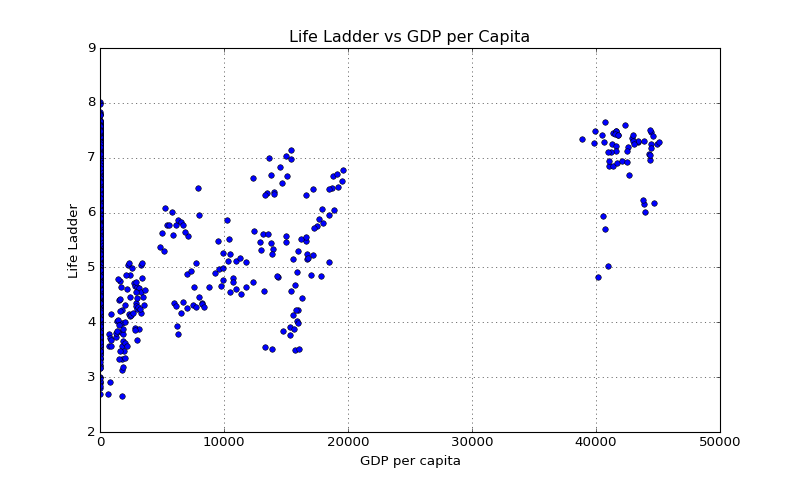

In [15]:
plt.figure(figsize=(10, 6))
plt.plot(data["GDP per capita"], data["Life Ladder"], "o", markersize=5)
plt.xlabel("GDP per capita")
plt.ylabel("Life Ladder")
plt.title("Life Ladder vs GDP per Capita")
plt.grid()

No linear or any other obvious pattern or relationship emmerges here. There are some ouliers points over 40,000 per capita with most country-years lying on line GDP = 0.

##### Let's log transform GDP per capita and see if any pattern emmerges 

The log transform is already provided to us. We can simply plug in the transformed column and recreate the above plot

<IPython.core.display.Javascript object>


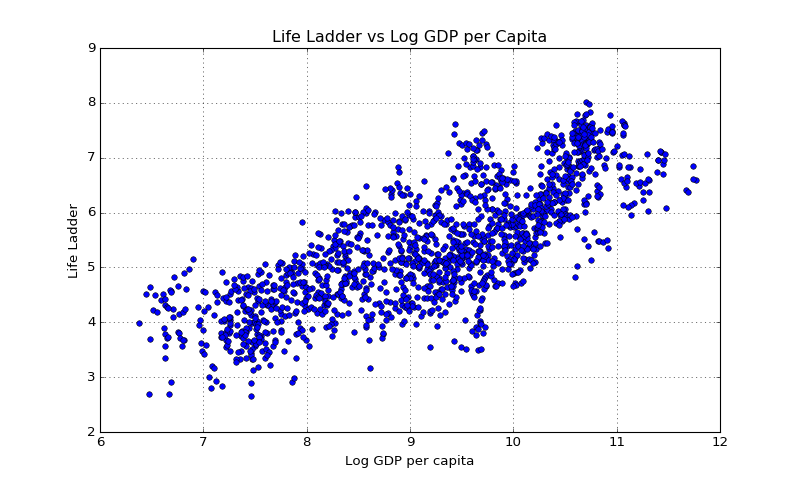

In [18]:
plt.figure(figsize=(10, 6))
plt.plot(data["Log GDP per capita"], data["Life Ladder"], "o", markersize=5)
plt.xlabel("Log GDP per capita")
plt.ylabel("Life Ladder")
plt.title("Life Ladder vs Log GDP per Capita")
plt.grid()

It looks like higher the log GDP of a country-year , higher is the life ladder score. <br> Can you guess what the correlation is between these two variables?  Here are some plots that may help:

It looks like higher the log GDP of a country-year , higher is the life ladder score. <br> Can you guess what the correlation is between these two variables?  Here are some plots that may help:

<IPython.core.display.Javascript object>


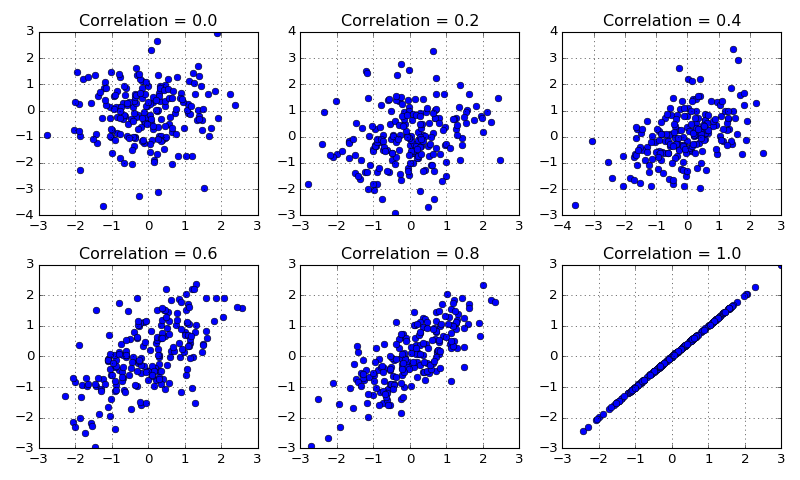

In [20]:
import warnings; warnings.simplefilter('ignore')
plt.figure(figsize=(10, 6))
for i in range(6):
    plt.subplot(2, 3, i + 1)
    test_data = np.random.multivariate_normal([0, 0], [[1, i / 5.0], [i / 5.0, 1]], 200)
    plt.plot(test_data[:,0], test_data[:,1], "o")
    plt.title("Correlation = {}".format(i / 5.0))
    plt.grid()
    
plt.tight_layout()

<div style="border: 3px solid green; padding: 10px">
  <b>Exercise 1:</b> (Anscombe's quartet) Given the data below, can you create a scatter plot of the data and compute correlations for each pair?
</div>

In [30]:
x1 = [10.0, 8.0,  13.0,  9.0,  11.0, 14.0, 6.0,  4.0,  12.0,  7.0,  5.0]
y1 = [8.04, 6.95, 7.58,  8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]

x2 = [10.0, 8.0,  13.0,  9.0,  11.0, 14.0, 6.0,  4.0,  12.0,  7.0,  5.0]
y2 = [9.14, 8.14, 8.74,  8.77, 9.26, 8.10, 6.13, 3.10, 9.13,  7.26, 4.74]

x3 = [10.0, 8.0,  13.0,  9.0,  11.0, 14.0, 6.0,  4.0,  12.0,  7.0,  5.0]
y3 = [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15,  6.42, 5.73]

x4 = [8.0,  8.0,  8.0,   8.0,  8.0,  8.0,  8.0,  19.0,  8.0,  8.0,  8.0]
y4 = [6.58, 5.76, 7.71,  8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89]

<IPython.core.display.Javascript object>


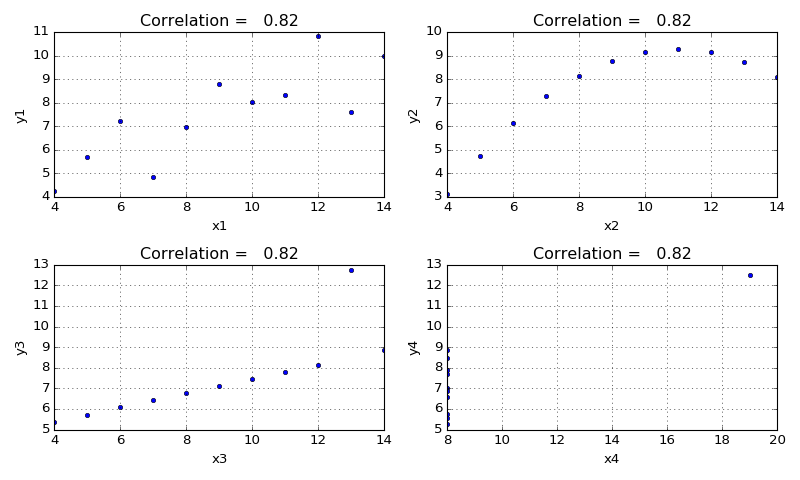

In [31]:
plt.figure(figsize=(10, 6))
for i in range(4):
    plt.subplot(2, 2, i + 1)
    plt.plot(eval("x" + str(i+1)), eval("y" + str(i+1)), "o", markersize=4)
    plt.xlabel("x" + str(i+1))
    plt.ylabel("y" + str(i+1))
    plt.title("Correlation = {:6.2f}".format(np.corrcoef(eval("x" + str(i+1)), eval("y" + str(i+1)))[0,1]))
    plt.grid()

plt.tight_layout()

<div style="border: 3px solid green; padding: 10px">
  <b>Exercise 2:</b> Compute the correlation between the 'Log GDP per capita and Life Ladder' of a country. Also compute the correlations of 'Generosity and Life Ladder' as well as 'Social support and Life Ladder'. Which variable shows the highest correlation?
</div>

In [29]:
# Correlation with Log GDP per capita and Life Ladder
print(data['Log GDP per capita'].corr(data['Life Ladder']))

# Correlation with Generosity and Life Ladder
print(data[...].corr(data[...]))

# Correlation with Social support and Life Ladder
print(data[...].corr(data[...]))

0.779476414815
0.204909612804
0.700299190125


<div style="border: 3px solid green; padding: 10px">
  <b>Exercise 3:</b> What is the correlation between 'Life Ladder and Social support'? Is it different from 'Social support and Life Ladder'?</div>

In [ ]:
# Correlation with Life Ladder and Social support
print(data[...].corr(data[...]))

##### However, remember...

## Correlation is NOT Causation

**"Correlation is not causation"** is a statistics mantra. **Correlation is a measure of how closely related two things are.** Think of it as a number describing the relative change in one thing when there is a change in the other, with 1 being a strong positive relationship between two sets of numbers, –1 being a strong negative relationship and 0 being no relationship whatsoever. <br><br> "Correlation is not causation" means that just because two things correlate does not necessarily mean that one causes the other. Above you saw correlation between 'Social Support' and 'Life Ladder' is same as the correlation between 'Life Ladder' and 'Social Support'. <br><br> We can not conclude from this number what parameter 'causes' the other. 

##### With these concepts in mind, let's try to...

<h2>Fit a Linear Model</h2>

Our goal in this section is to find a linear model between Log GDP per capita and Life Ladder.  The linear model has the form

$$ \mathrm{LifeLadder} = a \cdot \mathrm{LogGDPPerCapita} + b $$

We call $a$ the <b>slope</b> and $b$ the <b>intercept</b>.  The animation below shows different linear models superimposed on the data.

<IPython.core.display.Javascript object>


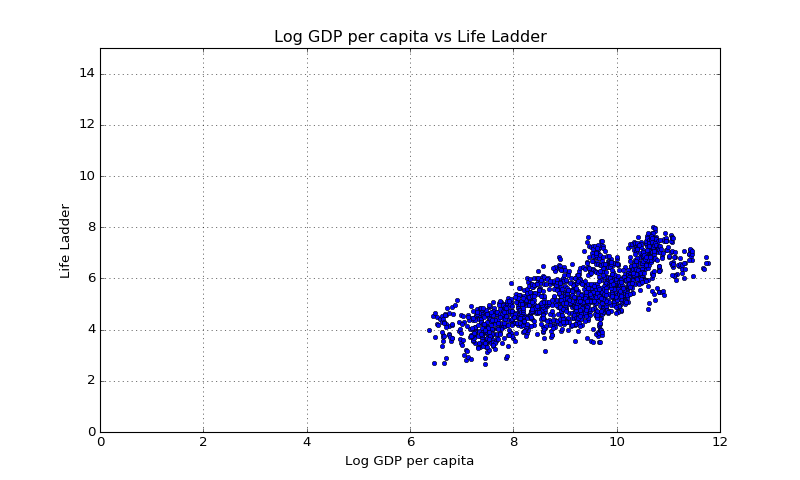

In [47]:
fig = plt.figure(figsize=(10, 6))
plt.ion()

plt.plot(data["Log GDP per capita"], data["Life Ladder"], "o", markersize=4)
plt.ylim(0,15)
plt.xlim(0,12)
plt.xlabel("Log GDP per capita")
plt.ylabel("Life Ladder")
plt.title("Log GDP per capita vs Life Ladder")
plt.grid()

xvals = np.arange(data["Log GDP per capita"].max())
for i in range(5):
    for s in range(5):
        intercept = 0.5*i
        slope = .5 * s
        yvals = slope * xvals + intercept
        line = plt.plot(xvals, yvals, color="r")
        fig.canvas.draw()
        line.pop(0).remove()

<div style="border: 3px solid green; padding: 10px">
  <b>Exercise 4:</b> Guess the slope and intercept of this linear model, without using a computer.  No cheating! Plot the line in together with the scatter plot
</div>

<IPython.core.display.Javascript object>


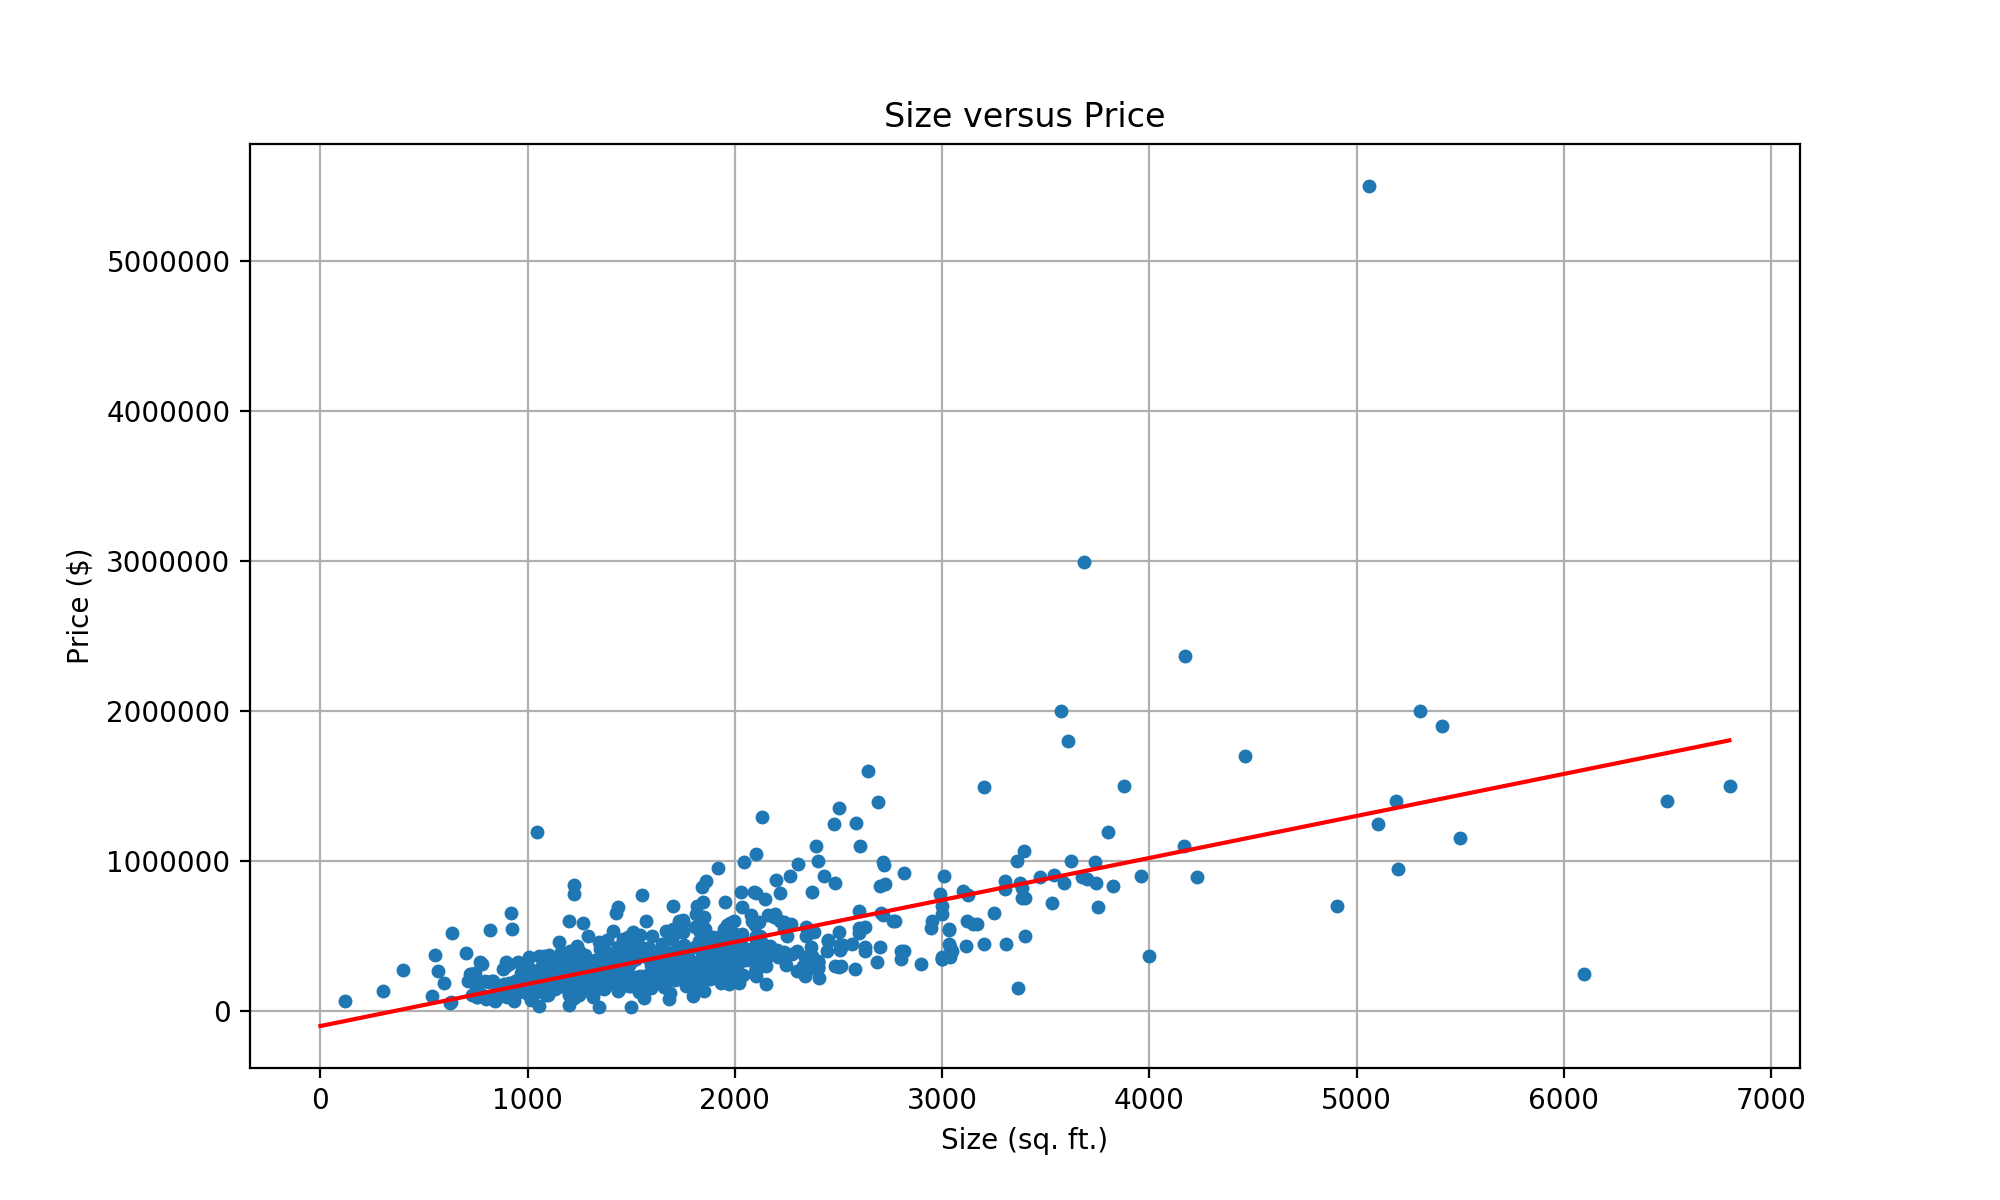

In [11]:
SLOPE = ...
INTERCEPT = ...

fig = plt.figure(figsize=(10, 6))
plt.ion()

plt.plot(data["Log GDP per capita"], data["Life Ladder"], "o", markersize=4)
plt.xlabel("Log GDP per capita")
plt.ylabel("Life Ladder")
plt.title("Log GDP per capita versus Life Ladder")
plt.grid()

xvals = np.arange(data["Log GDP per capita"].max()) 
yvals = SLOPE * xvals + INTERCEPT
line = plt.plot(xvals, yvals, color="r")

To fit the linear model, we need to define a <b>loss function,</b> which tells us how much to penalize "errors", or deviations between the actual and fitted values.  The loss function tells us how well the model fits our data.

The sum of squared errors is a popular loss function:

$$ \mathrm{loss} = \sum_{i=1}^N (y_i - a x_i - b)^2 $$

This loss function is popular for many reasons, one of which is its <b>tractability</b>.  In other words, it's easy to write down a closed-form expression for $a$ and $b$ so that we can compute them right away without ever needing to actually evaluate the loss function.

The animation below shows what the loss function looks like for various linear models.

In [53]:
def loss(x, y, slope, intercept):
    predictions = x * slope + intercept
    errors = y - predictions
    return np.sum(errors ** 2)

<IPython.core.display.Javascript object>


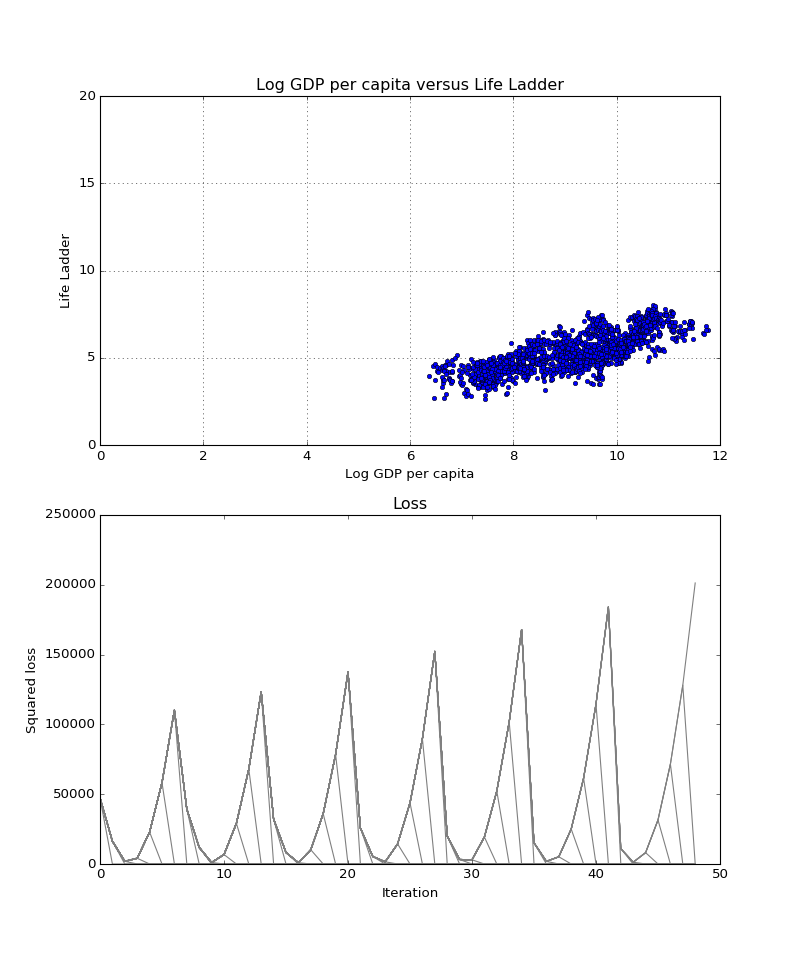

In [61]:
fig = plt.figure(figsize=(10, 12))
plt.ion()

losses = np.zeros(49)
counter = 0

xvals = np.arange(data['Log GDP per capita'].max())

plt.subplot(2, 1, 1)
plt.plot(data["Log GDP per capita"], data["Life Ladder"], "o", markersize=4)
plt.xlabel("Log GDP per capita")
plt.ylabel("Life Ladder")
plt.title("Log GDP per capita versus Life Ladder")
plt.grid()

for i in np.arange(7):
    for s in np.arange(7):
        intercept = 0.5*i
        slope = .25 * s
        yvals = slope * xvals + intercept
        plt.subplot(2, 1, 1)
        line = plt.plot(xvals, yvals, color="r")
        loss_value = loss(data["Log GDP per capita"], data["Life Ladder"], slope, intercept)
        #loss_value = loss_value/1e12
        losses[counter] = loss_value        

        plt.subplot(2, 1, 2)
        plt.plot(np.arange(len(losses)), losses, color ='0.5')
        plt.xlabel("Iteration")
        plt.ylabel("Squared loss")
        plt.title("Loss")
        
        fig.canvas.draw()
        line.pop(0).remove()
        counter += 1

<div style="border: 3px solid green; padding: 10px">
  <b>Exercise 5:</b> Compute the loss for the parameters you chose earlier
</div>

In [ ]:
loss = loss(data.Size, data.Price, SLOPE, INTERCEPT)
print(loss)

By now, we will assume you have figured out the closed-form expressions for $a$ and $b$.  Using some of the quantities we learned about in the previous lectures, there is a nice way to write down these formulas.  The slope works out to be the <b>correlation coefficient</b> of the two variables, times the ratio of the <b>standard deviations</b> of the response and predictor variables:

$$ a = r_{xy} \frac{s_y}{s_x} $$

where

$$ s_x = \sqrt{\frac{1}{n - 1} \sum_{i=1}^n (x_i - \bar{x})^2} $$
$$ s_y = \sqrt{\frac{1}{n - 1} \sum_{i=1}^n (y_i - \bar{y})^2} $$
$$ r_{xy} = \frac{\frac{1}{n - 1} \sum_{i=1}^n (x_i - \bar{x}) (y_i - \bar{y})}{s_x s_y} $$

The intercept is just

$$ b = \bar{y} - a \bar{x} $$.

Now we can finally see what the optimal fit is.

In [75]:
slope_opt = data["Log GDP per capita"].cov(data["Life Ladder"]) / data["Log GDP per capita"].var()
intercept_opt = data["Life Ladder"].mean() - slope_opt * data["Log GDP per capita"].mean()

print("Optimal slope: {}".format(slope_opt))
print("Optimal intercept: {}".format(intercept_opt))

fig = plt.figure(figsize=(10, 6))
plt.plot(data["Log GDP per capita"], data["Life Ladder"], "o", markersize=4)
plt.xlabel("Log GDP per capita")
plt.ylabel("Life Ladder")
plt.title("Life Ladder versus Log GDP per capita")
plt.grid()

xvals = np.arange(data['Log GDP per capita'].max())
yvals = slope_opt * xvals + intercept_opt
plt.plot(xvals, yvals, color="r")
fig.canvas.draw()

Optimal slope: 0.7497144531950475
Optimal intercept: -1.4517551267354083


So every additional 0.737 in Log GDP per capita increases the life ladder by 1 point.

<h2>Check the Goodness of Fit</h2>

Now that we have our linear model, how do we tell if it's any good?  While we computed the slope and intercept by hand above, let's try doing this within the Python package statsmodels, which will give us a few extra things for free:

In [92]:
import statsmodels.api as sm
data["Constant"] = 1
m = sm.OLS(data["Life Ladder"], data[["Log GDP per capita", "Constant"]]).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Life Ladder   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                     1841.
Date:                Sun, 31 Mar 2019   Prob (F-statistic):          4.25e-243
Time:                        16:55:28   Log-Likelihood:                -1284.6
No. Observations:                1181   AIC:                             2573.
Df Residuals:                    1179   BIC:                             2583.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
Log GDP per capita     0.7497      0.017     42.912      0.000         0.715     0.784
Constant              -1.4518      0.161     -8.996      0.000        -1.768    -1.135
==============================================================================
Omnibus:                       16.582   Durbin-Watson:                   0.478
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               12.436
Skew:                          -0.150   Prob(JB):                      0.00199
Kurtosis:                       2.597   Cond. No.                         72.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

While there are lots of numbers here, a few confirm what we could probably tell from linear inspection: overall, this is a good model:

- The <b>R-squared</b>, which is the squared correlation coefficient, is 61.0%, which is pretty good for a linear model.  Just how good is given by the <b>F-statistic</b>, which roughly tells us how implausible it would be to see such a high correlation between the Log GDP per capita and Life Ladder that we happen to have here, under the assumption that there is actually no correlation between the two.  The actual probability is given by the <b>P-value</b> of the F-statistic, which is less than $10^{-240}$.  This means the probability of seeing a relationship this strong if in truth one did not exist is less than the probability that you could pick one atom out of all of the atoms in the universe.
- While the R-squared gives an idea of how good the overall linear model is, we can look at the next table to see how much the Log GDP per capita and the intercept (constant) contribute to the model.  For example, maybe we don't need to bother with a constant term at all and just looking at the $a \cdot \mathrm{(Log\ GDP\ per\ capita)}$ part of the model would be good enough.  However, the p-values on both of these variables are quite small, which tells us that both pieces of the model have a statistically significant contribution.

<div style="border: 3px solid green; padding: 10px">
  <b>Exercise 5:</b> Based on the output above, would you accept or reject the null hypothesis that higher Log GDP indicates higher Life ladder (happiness)
</div>

## Outiler Analysis 

Imagine now if an outlier were thrown into our dataset.  At Log GPD per capita of 2 and Life Ladder of 15 it would completely throw off our model -- remember that our loss function penalizes <i>squared</i> errors, so the linear model will do whatever it can to make sure it gets right such extreme values.

<div style="border: 3px solid green; padding: 10px">
  <b>Exercise 6:</b> Add an extreme data point to the house price dataset and rerun statsmodels' linear model fit on the new dataset.  What happens?
</div>

In [93]:
m2 = sm.OLS(
    data["Life Ladder"].append(pd.Series([...])), 
    data[["Log GDP per capita", "Constant"]].append(pd.DataFrame({"Log GDP per capita":[...], "Constant":[1]}))).fit()
m2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.500
Model:                            OLS   Adj. R-squared:                  0.500
Method:                 Least Squares   F-statistic:                     1180.
Date:                Sun, 31 Mar 2019   Prob (F-statistic):          7.30e-180
Time:                        16:55:34   Log-Likelihood:                -1465.2
No. Observations:                1182   AIC:                             2934.
Df Residuals:                    1180   BIC:                             2945.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
Constant              -0.8776      0.185     -4.744      0.000        -1.241    -0.515
Log GDP per capita     0.6884      0.020     34.357      0.000         0.649     0.728
==============================================================================
Omnibus:                     1215.280   Durbin-Watson:                   0.630
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           281311.681
Skew:                           4.326   Prob(JB):                         0.00
Kurtosis:                      78.080   Cond. No.                         71.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

You should find that the R-squared is still good and that the p-values are all still practically zero -- but the values of the slope and intercept may be completely different.  Something about this does not seem right: how could one data point distort the model so much?  Clearly, R-squared doesn't capture the whole story.

The linear model makes two critical assumptions (there are others, but these are two of the most important):

- <b>Homoskedasticity</b>: This is a fancy way of saying that the variance of the errors is the same no matter what the value of the predictor variable is.  In other words, the predicted range of house prices is about as wide for a 1,000 square foot house as it is for a 10,000 square foot house.
- <b>Independence of errors</b>: This means that knowing how much the model gets one house price wrong shouldn't tell us anything about how much the model gets wrong the prices of other houses.

Both of these assumptions are quite strong and rarely hold in practice: the goal is more to make sure they hold reasonably well.  Let's look at the residuals to see how well they hold:

<IPython.core.display.Javascript object>


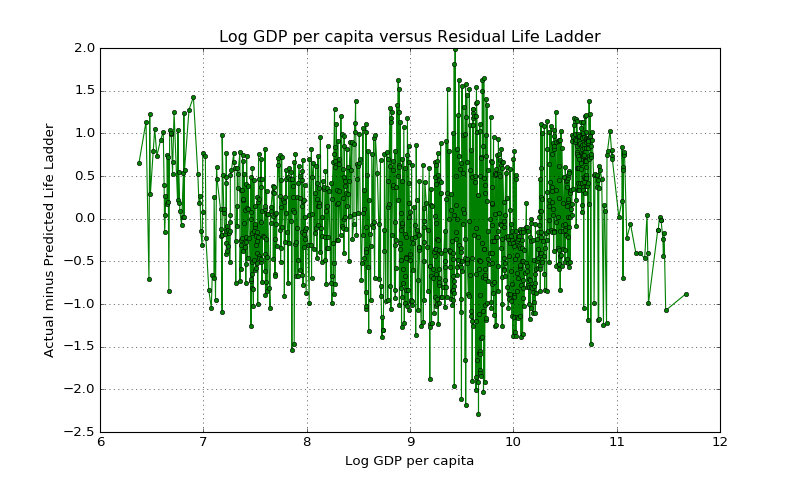

In [98]:
data["Residual"] = m.resid
data.sort_values('Log GDP per capita', inplace=True)
fig = plt.figure(figsize=(10, 6))
plt.plot(data["Log GDP per capita"], data["Residual"], "go-", markersize=4)
plt.xlabel("Log GDP per capita")
plt.ylabel("Actual minus Predicted Life Ladder")
plt.title("Log GDP per capita versus Residual Life Ladder")
plt.grid()

<div style="border: 3px solid green; padding: 10px">
  <b>Exercise 7:</b> Looking at the above plot, do you think the above two assumptions of linear regressions hold?
</div>

<div style="border: 3px solid green; padding: 10px">
  <b>Bonus exercise 1:</b> How would you confirm that the log transformation has made the distribution more normal?
</div>

<div style="border: 3px solid green; padding: 10px">
  <b>Bonus exercise 2:</b> Plot the scatter plot together with the regular GDP per capita and Log GDP per capita space fitted lines
</div>